     employee_id  memory  processing  storage  inverse_price utilization_bin
0           1743    0.38        0.23     0.15           0.25            high
1           1752    0.45        0.23     0.08           0.25            high
2           1758    0.38        0.30     0.08           0.25            high
3           1825    0.30        0.30     0.15           0.25            high
4           1842    0.30        0.30     0.15           0.25            high
..           ...     ...         ...      ...            ...             ...
141         1463    0.23        0.15     0.38           0.25             low
142         1625    0.23        0.15     0.38           0.25             low
143         1377    0.15        0.23     0.38           0.25             low
144         1353    0.15        0.23     0.38           0.25             low
145         1229    0.15        0.15     0.45           0.25             low

[146 rows x 6 columns]


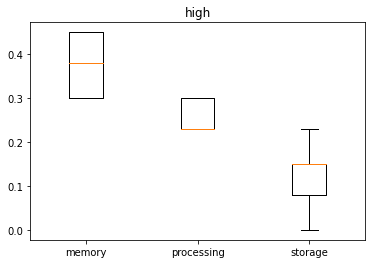

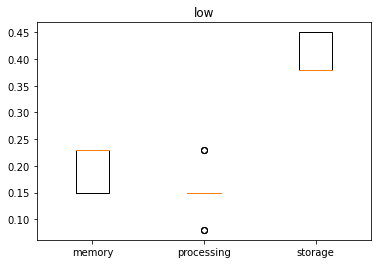

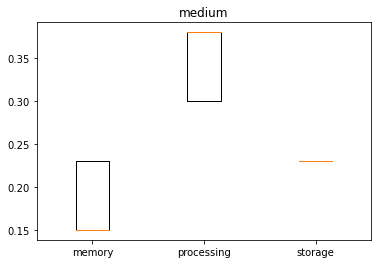

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

df_utilization = pd.read_csv("util_b_emp.csv", sep=';') 
df_survey_emp= pd.read_csv("survey_emp.csv",  sep=';') 
df_vendor_opt= pd.read_csv("vendor_options.csv", sep =';') 

# Join utilization_bin to the df_survey 
df_survey = pd.merge(df_survey_emp, df_utilization,on ='employee_id')
print(df_survey)
# Draw box plots    
for utilization_bin, sub_df in df_survey.groupby('utilization_bin'):
    plt.figure(random.randint(1,10^6))
    plt.boxplot(sub_df.drop(['employee_id', 'utilization_bin', 'inverse_price'], axis = 1).values,
                 labels = sub_df.drop(['employee_id', 'utilization_bin', 'inverse_price'], axis = 1).columns)
    plt.title(f'{utilization_bin}')

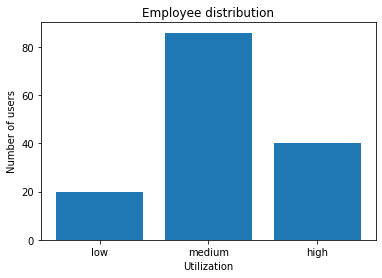

In [131]:
# Count how many users is in every utilization bin
high_users = df_utilization['utilization_bin'].str.count('high').sum()
medium_users = df_utilization['utilization_bin'].str.count('medium').sum()
low_users = df_utilization['utilization_bin'].str.count('low').sum()

# Bar plot with utilization distribution
plt.bar(['low', 'medium', 'high'],[low_users, medium_users, high_users])

# Adding title to the Plot
plt.title("Employee distribution")
 
# Setting the X and Y labels
plt.xlabel('Utilization')
plt.ylabel('Number of users')
 
plt.show()


In [132]:
df_vendor_values = df_vendor_opt.drop(['computer_id'], axis = 1)
print(df_vendor_values)
# Normalize values
# First Case: by length of the vector (L2 normalization) - Better
df_vendor_values = df_vendor_values/np.sqrt(np.square(df_vendor_values).sum())

# Second Case: by maximum value
#df_vendor_values = df_vendor_opt/df_vendor_opt.max()
#df_vendor_values['inverse_price'] = df_vendor_opt['inverse_price']/df_vendor_opt['inverse_price'].max()

df_survey_values = df_survey_emp.drop(['employee_id'], axis = 1) 

print(df_vendor_values)
print(df_survey_values)


    memory  processing  storage  inverse_price
0        5           7       10            2.7
1        9           8        9            1.3
2        8           9       10            1.0
3        8           8        9            1.7
4        5           4        4            5.7
5        6           7        7            3.3
6        7          10        7            2.0
7        9           6        9            2.0
8        9           8        7            2.0
9        7           7        9            2.3
10       8           9       10            1.0
      memory  processing   storage  inverse_price
0   0.200967    0.273931  0.356462       0.312730
1   0.361741    0.313064  0.320815       0.150574
2   0.321547    0.352197  0.356462       0.115826
3   0.321547    0.313064  0.320815       0.196904
4   0.200967    0.156532  0.142585       0.660207
5   0.241160    0.273931  0.249523       0.382225
6   0.281354    0.391330  0.249523       0.231652
7   0.361741    0.234798  0.320815  

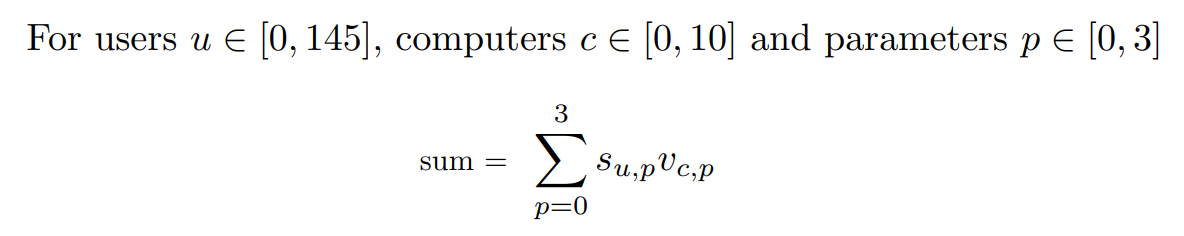

In [133]:
from IPython.display import display
from PIL import Image

path="./results/Weighted_sum.png"
display(Image.open(path))

# Score every computer for each user
scores_tab = []
for _, survey_row in df_survey_values.iterrows():
    for _, vendor_row in df_vendor_values.iterrows(): 
        sum = 0 
        for param_idx in range(0,4): 
                sum += survey_row[param_idx]*vendor_row[param_idx]  
        scores_tab.append(sum)

In [134]:
# Assign computer_scores for each user
final_values = np.reshape(scores_tab, (146,11))
# For each user find the highest value (the best suitable computer)
top_computers_tab = []
for user_id in range(0,145): 
    local_maximum = max(final_values[user_id])
    local_maximum_index = np.where(final_values[user_id] == local_maximum)
    maximum_position = list(local_maximum_index[0])
    top_computers_tab.extend(maximum_position)


    # In case we would like to equalize or favour specific utilization_bin
    # if df_survey['utilization_bin'][user_id]=='low': 
    #     for low_user in range(0, 4):
    #         top_computers_tab.extend(maximum_position)
    # elif df_survey['utilization_bin'][user_id]=='medium':
    #     for medium_user in range(0, 1):
    #         top_computers_tab.extend(maximum_position)
    # else:  
    #     for high_user in range(0, 2):
    #         top_computers_tab.extend(maximum_position)


In [135]:
from collections import Counter    

# Change index to 'computer_id'
vendor_id_tab = []
for user_computer_id in top_computers_tab:
    vendor_id_tab.append(int(df_vendor_opt.iloc[user_computer_id]['computer_id']))

# Count preferences of users for each computer
freq = Counter(vendor_id_tab)
print(df_vendor_opt.sort_values(by = 'computer_id'))

    computer_id  memory  processing  storage  inverse_price
3             1       8           8        9            1.7
5             2       6           7        7            3.3
4             3       5           4        4            5.7
2             4       8           9       10            1.0
9             7       7           7        9            2.3
7             8       9           6        9            2.0
8             9       9           8        7            2.0
10           12       8           9       10            1.0
0            13       5           7       10            2.7
1            16       9           8        9            1.3
6            20       7          10        7            2.0


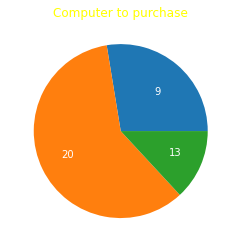

In [136]:
# Make Pie Chart for the results

labels = freq.keys()
sizes = freq.values()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,  autopct='%1.1f%%',  pctdistance=1.25, labeldistance=.6, textprops={'color':'white'})

# Adding Title to the Plot
plt.title("Computer to purchase", color='yellow')

plt.show()

In [137]:
# Mark the most suitable computers
suitable_computers = list(set(top_computers_tab))
df_vendor_opt.sort_values(by='computer_id').style \
.apply(lambda x: ['background: green' if i in suitable_computers else '' for i,_ in x.iteritems()])

,computer_id,memory,processing,storage,inverse_price
3,1,8,8,9,1.700000
5,2,6,7,7,3.300000
4,3,5,4,4,5.700000
2,4,8,9,10,1.000000
9,7,7,7,9,2.300000
7,8,9,6,9,2.000000
8,9,9,8,7,2.000000
10,12,8,9,10,1.000000
0,13,5,7,10,2.700000
1,16,9,8,9,1.300000
